****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.


 Answer 1.1 

Country: Indonesia, Number of projects: 19
Country: China, Number of projects: 19
Country: Vietnam, Number of projects: 17
Country: India, Number of projects: 16
Country: Yemen, Republic of, Number of projects: 13
Country: Bangladesh, Number of projects: 12
Country: Morocco, Number of projects: 12
Country: Nepal, Number of projects: 12
Country: Africa, Number of projects: 11
Country: Mozambique, Number of projects: 11

 Answer 1.2 

                    _id
countryshortname       
China                19
Indonesia            19
Vietnam              17
India                16
Yemen, Republic of   13
Nepal                12
Bangladesh           12
Morocco              12
Mozambique           11
Africa               11

 Answer 2.0, not counting blank theme names 

Rank: 1 Theme: 11 - Environment and natural resources management, Frequency: 135 
Rank: 2 Theme: 10 - Rural development, Frequency: 135 
Rank: 3 Theme: 2 - Public sector governance, Frequency: 126 
Rank: 4 Theme: 

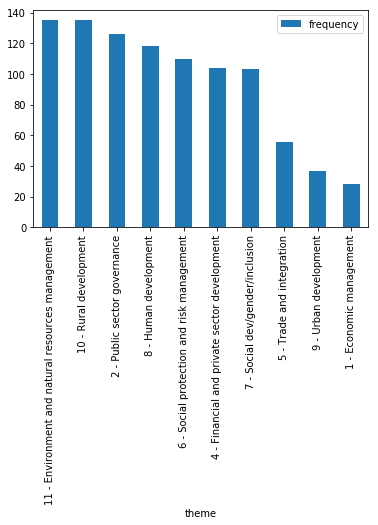


 Answer 3.1 - Missing names corrected.

 Answer 3.2 - Missing names corrected.


In [86]:
import pandas as pd
import json
import matplotlib.pyplot as plt


def most_projects_as_series(num_countries, workingdf):
    '''return a series of countries with the most projects 
        
       Keyword arguments:
       num_countries -- number of themes to return
       workingdf -- dataframe containing data to analyze
    '''
    return workingdf['countryshortname'].value_counts(sort=True)[:num_countries]


def most_projects_as_dataframe(num_countries, workingdf):
    '''return a dataframe of countries with the most projects 
        
       Keyword arguments:
       num_countries -- number of themes to return
       workingdf -- dataframe containing data to analyze
    '''
    return workingdf.groupby('countryshortname').count().sort_values(by='_id', ascending=False).head(num_countries)


def top_themes(num_rankings, unique_code_names, workingdf):
    '''Return a dictionary of theme, frequency count for themes in the 'mjtheme_namecode' column.
       Account for duplicate entries of a theme on one project.
       Note: Ranking by code only (unique_code_names = False) or code + name (unique_code_names = True) 
             produces different rankings.

       Keyword arguments:
       num_rankings -- number of themes to return
       unique_code_names -- if true, count "theme code" - "theme name" pairs, otherwise codes only
       workingdf -- dataframe containing data to analyze
    '''
    unique_themes_dict = {}

    for theme_list in workingdf.mjtheme_namecode:
        themes_for_project = []
        for themes in theme_list:
            if unique_code_names:
                code_name = themes['code'] + " - " + themes['name']
            else:
                code_name = themes['code']
            
            if code_name not in themes_for_project:
                if code_name in unique_themes_dict:
                    unique_themes_dict[code_name] += 1
                    themes_for_project.append(code_name)                    
                else:
                    unique_themes_dict[code_name] = 1
                    themes_for_project.append(code_name)  
    
    return sorted(unique_themes_dict.items(), key=lambda item: item[1], reverse=True)[:num_rankings]


def create_theme_dict(workingdf):
    """Return a dictionary with missing theme names filled in based on code values.
    
       Keyword arguments:
       workingdf -- dataframe containing themes
    """
    unique_themes_dict = {}
    
    for theme_list in workingdf.mjtheme_namecode:
        for themes in theme_list:
            if themes['name'] != "" and themes['code'] not in unique_themes_dict:
                unique_themes_dict[themes['code']] = themes['name']

    return unique_themes_dict

def missing_theme_names(workingdf):
    """Return true if any theme names are missing from theme entries,
       false otherwise.
    
       Keyword arguments:
       workingdf -- dataframe containing theme entries
    """
    missing = False
    for theme_list in workingdf.mjtheme_namecode:
        for themes in theme_list:
            if themes['name'] == "":
                #print('found a missing name for ', themes['code'])
                missing = True
    return missing

def update_theme_name(theme_list, theme_dict):
    """Correct missing theme names using name associated
       with theme code
       
       Keyword arguments:
       theme_list -- list containing themes
       theme_dict -- dict containing all code,name themes
    """    
    for themes in theme_list:
        if themes['name'] == "":
            themes['name'] = theme_dict[themes['code']]

    return theme_list


def update_themes_apply(workingdf, theme_dict):
    """Return a dataset with theme names filled in using apply
    
       Keyword arguments:
       workingdf -- dataframe containing theme entries
       theme_dict -- dict containing all code,name themes
    """    
    workingdf['mjtheme_namecode'].apply(lambda theme: update_theme_name(theme, theme_dict))
    return workingdf

def update_themes_map(workingdf, theme_dict):
    """Return a dataset with theme names filled in using map
    
       Keyword arguments:
       workingdf -- dataframe containing theme entries
       theme_dict -- dict containing all code,name themes
    """    
    workingdf['mjtheme_namecode'].map(lambda theme: update_theme_name(theme, theme_dict))
    return workingdf


if __name__ == '__main__':
    
    json_df = pd.read_json('data/world_bank_projects.json')
        
    #Question 1: Find the 10 countries with most projects
    print('\n Answer 1.1 \n')
    most_projects_series = (most_projects_as_series(10, json_df))
    for index, value in most_projects_series.items():
        print('Country: {}, Number of projects: {}'.format(index, value))
    
    print('\n Answer 1.2 \n')
    df_mostprojects = (most_projects_as_dataframe(10, json_df))
    print(df_mostprojects.iloc[:, 0:1])


    #Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')
    print('\n Answer 2.0, not counting blank theme names \n')
    top_themes_list = top_themes(num_rankings = 10, unique_code_names = True, workingdf = json_df)
    for i, unique_theme in enumerate(top_themes_list):
        print('Rank: {} Theme: {}, Frequency: {} '.format(i+1, unique_theme[0], unique_theme[1]))
    df = pd.DataFrame(top_themes_list, columns=['theme', 'frequency'])
    df.plot(kind='bar', x='theme')
    plt.show()

    #Question 3: In 2. above you will notice that some entries have only the code and the name is missing. 
    #Create a dataframe with the missing names filled in.
    theme_dict = create_theme_dict(json_df)
    updated_df = update_themes_apply(json_df, theme_dict)
    if not missing_theme_names(updated_df):
        print('\n Answer 3.1 - Missing names corrected.')
    else:
        print('problem with answer 3.1 Please help Alexia solve this! :)')
    updated_df = update_themes_map(json_df, theme_dict)
    if not missing_theme_names(updated_df):
        print('\n Answer 3.2 - Missing names corrected.')
    else:
        print('problem with answer 3.2. Please help Alexia solve this! :)')


    
 